# Data Cleaning

Tolong baca perintah dan tagar komen dengan saksama.

Silahkan tulis analisa dan alasan anda membuat keputusan di dalam notebook ini, baik sebagai comment ataupun text markdown. Sertakan step analisis pendukung seperti plot distribusi, analisis deskriptif, dll yang terkait.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## A. Outlier Handling

Lakukan analisis outlier, dan hilangkan data pada kolom yang menurut anda mengandung outlier.

In [ ]:
df_california = pd.read_csv('california_dataset.csv')

First, we have to know the numerical variable

In [ ]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Secondly, We need to see the data distribution

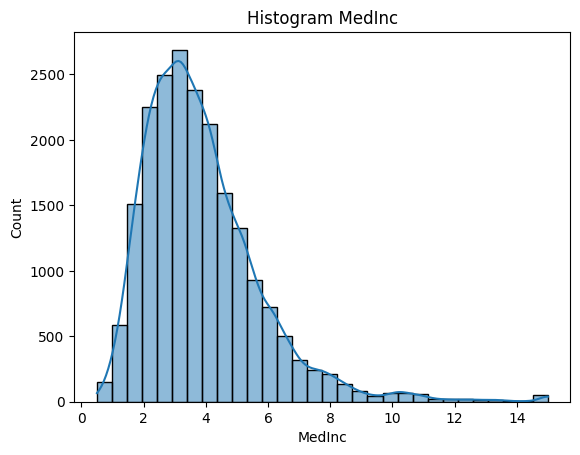

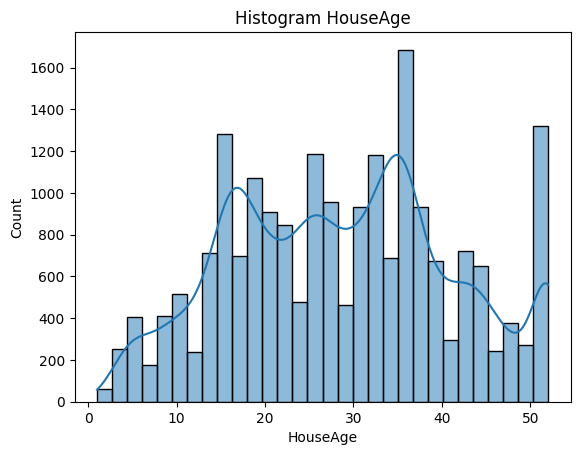

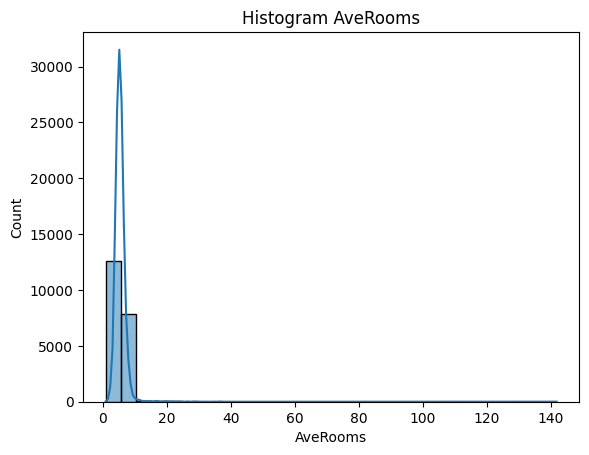

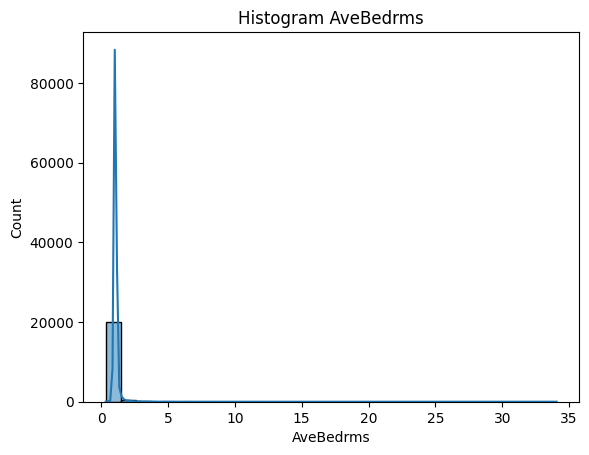

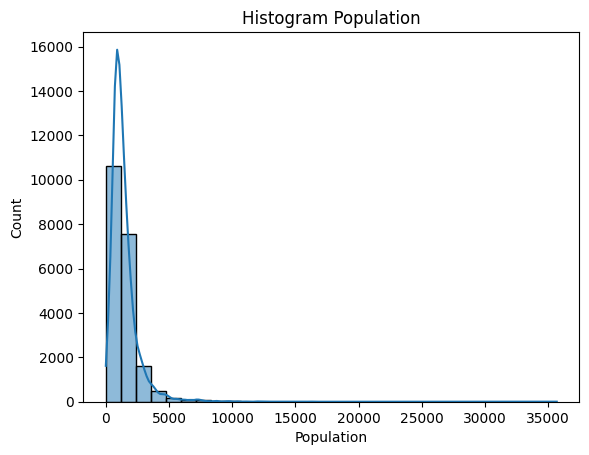

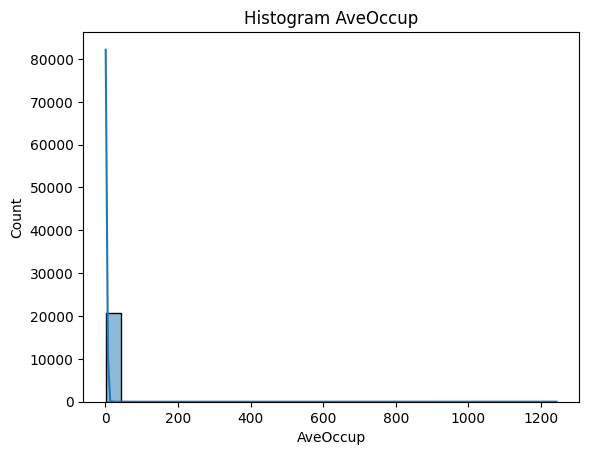

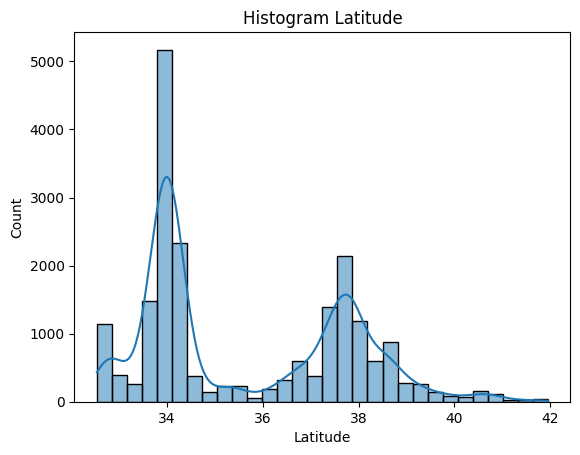

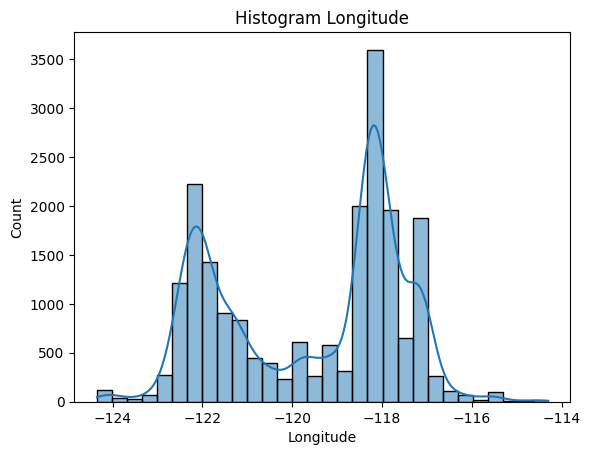

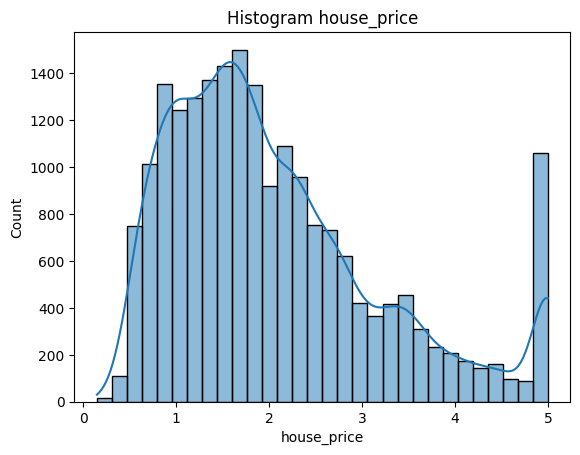

In [ ]:
for col in df_california.columns:
   sns.histplot(df_california[col], kde=True, bins=30)
   plt.title(f"Histogram {col}")
   plt.show()

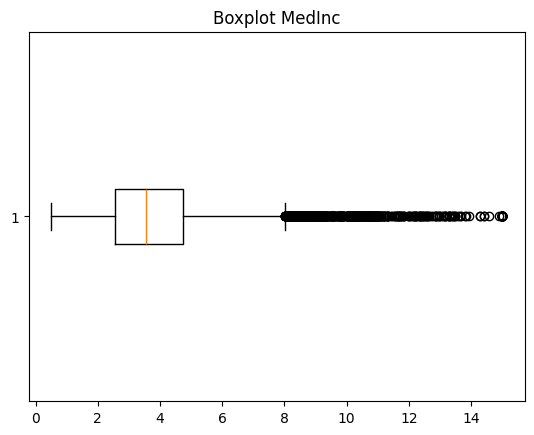

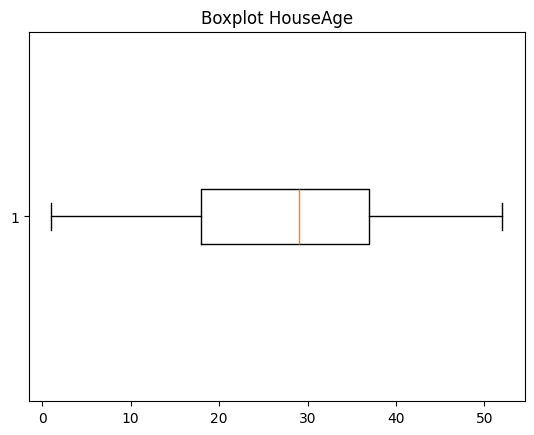

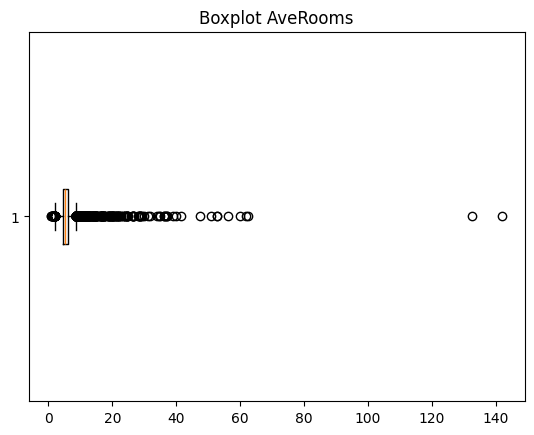

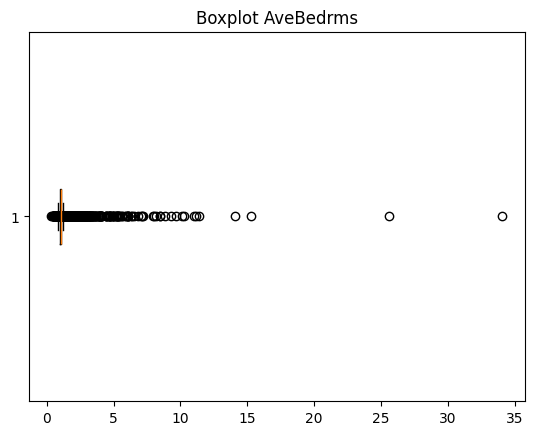

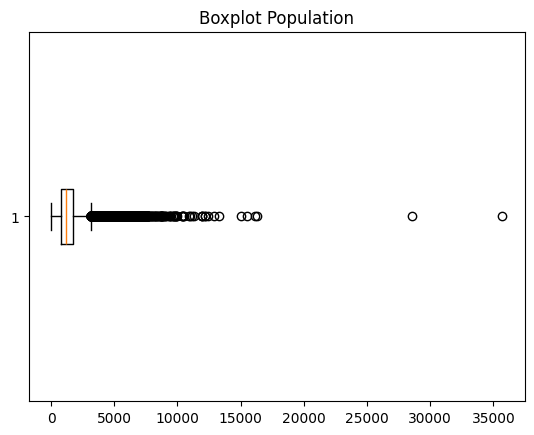

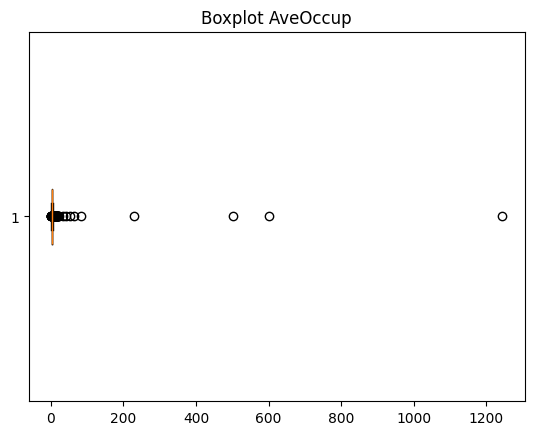

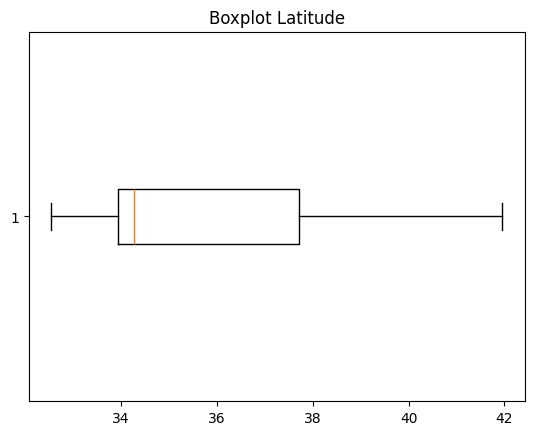

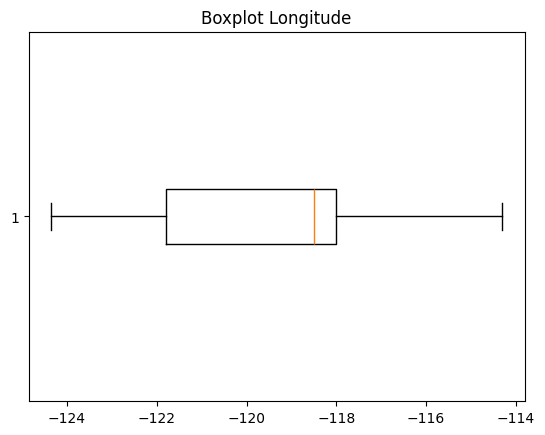

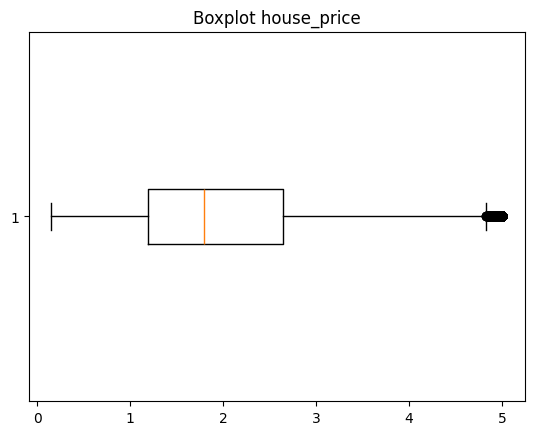

In [ ]:
for col in df_california.columns:
    plt.boxplot(df_california[col], vert=False)
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
def calculate_outlier_info(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100

    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": len(outliers),
        "Total Count": len(data),
        "Outlier Percentage": round(outlier_percentage, 2)
    }

In [ ]:
outlier_percentages = {}
for feature in df_california.columns:
    outlier_percentages[feature] = calculate_outlier_info(df_california, feature)["Outlier Percentage"]

outlier_df = pd.DataFrame(
    {
        'Feature': outlier_percentages.keys(),
        'Outlier Percentage': outlier_percentages.values(),
    }
)
outlier_df

,Feature,Outlier Percentage
0,MedInc,3.30
1,HouseAge,0.00
2,AveRooms,2.48
3,AveBedrms,6.90
4,Population,5.79
5,AveOccup,3.44
6,Latitude,0.00
7,Longitude,0.00
8,house_price,5.19


In [ ]:
# save data length before outlier removal
length_data = len(df_california)
length_data

20640

In [ ]:
outlier_df["Outlier Percentage"].sum()

np.float64(27.1)

If we choose to remove all outlier data it will be decreasing 27.1% of data

because we only have 20k+ data rows (small) , so we targetting < 7% of data will be removed because cleaning outlier. to train ML model, needs alot of data

### 1 . Median Income (MedInc)

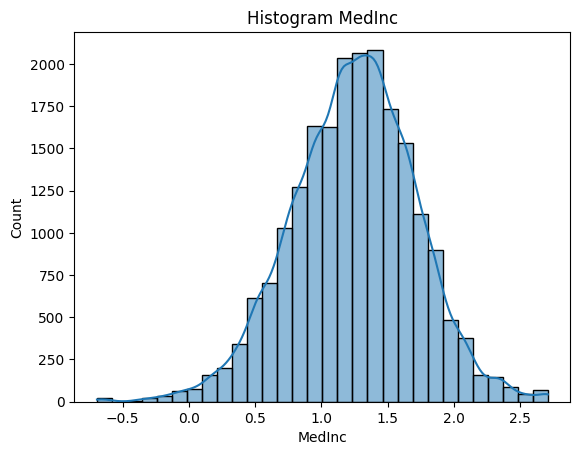

In [ ]:
df_california['MedInc'] = np.log(df_california['MedInc'])
sns.histplot(df_california["MedInc"], kde=True, bins=30)
plt.title(f"Histogram MedInc")
plt.show()

In [ ]:
calculate_outlier_info(df_california , "MedInc")

{'Q1': np.float64(0.9413344817656227),
 'Q3': np.float64(1.5567225532620639),
 'IQR': np.float64(0.6153880714964411),
 'Lower Bound': np.float64(0.018252374520960957),
 'Upper Bound': np.float64(2.4798046605067254),
 'Outlier Count': 277,
 'Total Count': 20640,
 'Outlier Percentage': 1.34}

we decreasing up to 2% outlier

### 2. House age (No Outlier)

### 3. Averooms


In [ ]:
df_california["AveRooms"].describe()

,AveRooms
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


In [ ]:
Q3 = df_california["AveRooms"].quantile(0.75)
Q1 = df_california["AveRooms"].quantile(0.25)

upper_whisker = Q3 + 1.5 * (Q3 - Q1)
lower_whisker = Q1 - 1.5 * (Q3 - Q1)
upper_whisker

np.float64(8.469878027106942)

In [ ]:
df_california[df_california["AveRooms"] > upper_whisker]["AveRooms"].mean()

np.float64(14.005028976242173)

14 average of aveRooms... on aveRooms that > upperWhisker

In [ ]:
median_upper = df_california[df_california["AveRooms"] > upper_whisker]["AveRooms"].median()

9.8 median of aveRooms... on aveRooms that > upperWhisker

<Axes: >

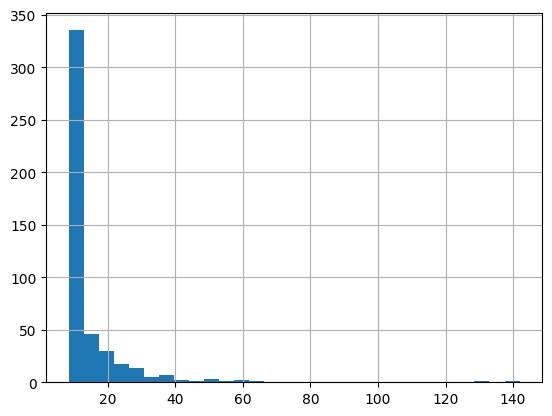

In [ ]:
df_california[df_california["AveRooms"] > upper_whisker]["AveRooms"].hist(bins=30)

now let's see below lower whisker

In [ ]:
mean_lower = df_california[df_california["AveRooms"] < lower_whisker]["AveRooms"].mean()
mean_lower

np.float64(1.69755548387888)

<Axes: >

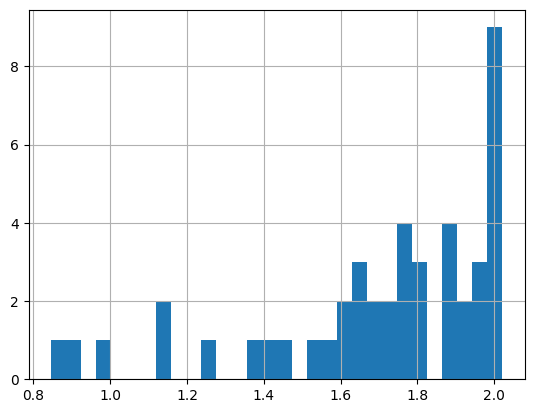

In [ ]:
df_california[df_california["AveRooms"] < lower_whisker]["AveRooms"].hist(bins=30)

then removed data that AveRooms > median upper whisker,  and AveRooms < Mean lower whisker

In [ ]:
count1 = len(df_california[df_california["AveRooms"] < mean_lower])
count2 = len(df_california[df_california["AveRooms"] > median_upper])
print(round((count1 + count2) / len(df_california), 2))

0.01


just removed 1% of the total data

In [ ]:
df_california = df_california[
    (df_california["AveRooms"] > mean_lower) &
    (df_california["AveRooms"] < median_upper)
]

why i do this...
It because i just want to remove outlier from outlier (extreme outlier) without removing all the outlier data and minimalized the decreasing data from removing outlier

In [ ]:
df_california["AveRooms"].describe()

,AveRooms
count,20389.000000
mean,5.276943
std,1.220067
min,1.708995
25%,4.433962
50%,5.214286
75%,6.016000
max,9.867036


<Axes: >

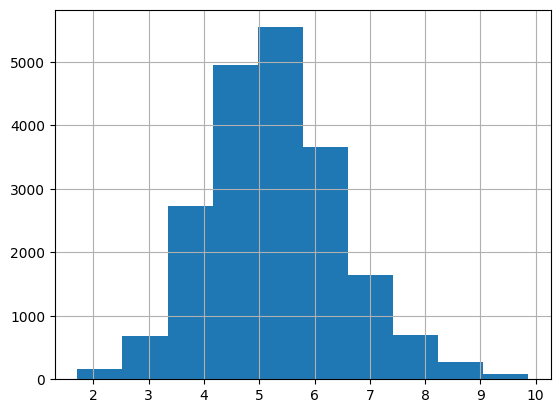

In [ ]:
df_california["AveRooms"].hist()

the distribution now looks nice after removing outlier data

### 4. AveBedrms


In [ ]:
info_outlier_bedrooms = calculate_outlier_info(df_california, "AveBedrms")

In [ ]:
df_california["AveBedrms"].describe()

,AveBedrms
count,20389.000000
mean,1.066104
std,0.127978
min,0.333333
25%,1.005540
50%,1.047814
75%,1.097222
max,3.411111


<Axes: >

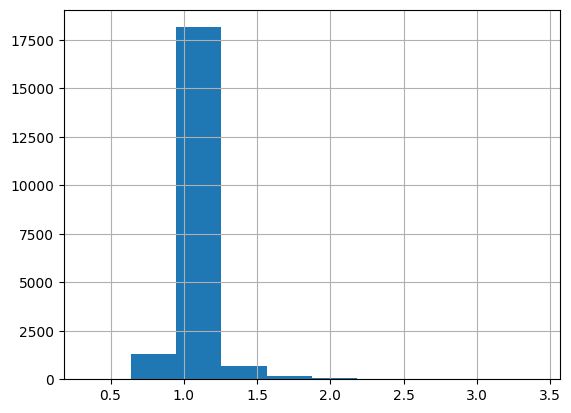

In [ ]:
df_california["AveBedrms"].hist()

different from before , maybe because AveRooms is highly correlated to AveBedrms

and i think its fine to having AveBedrmns around this distribution. so my decision is leaving outlier as it is

In [ ]:
df_california[df_california['AveBedrms'] > info_outlier_bedrooms["Upper Bound"]]["AveBedrms"].count()

np.int64(1058)

In [ ]:
info_outlier_bedrooms["Outlier Percentage"]

6.12

### 5. Population

In [ ]:
df_california["Population"].describe()

,Population
count,20389.000000
mean,1435.368287
std,1133.398497
min,3.000000
25%,796.000000
50%,1173.000000
75%,1731.000000
max,35682.000000


In [ ]:
info_outlier_population = calculate_outlier_info(df_california, "Population")

In [ ]:
info_outlier_population["Outlier Percentage"]

5.86

In [ ]:
info_outlier_population["Upper Bound"]

np.float64(3133.5)

In [ ]:
info_outlier_population["Lower Bound"]

np.float64(-606.5)

In [ ]:
df_california[df_california["Population"] <= 0]["Population"].count()

np.int64(0)

theres no population <= 0 , so lets ignore lower whisker data outlier

<Axes: >

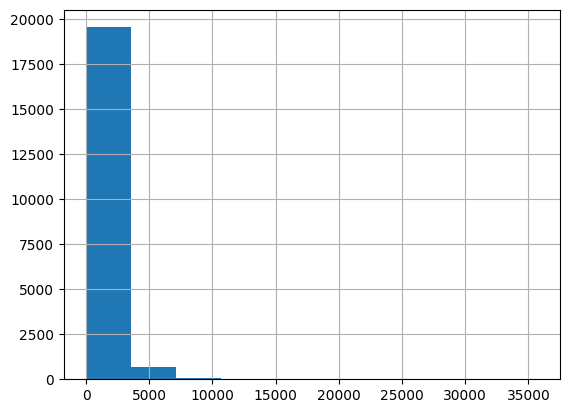

In [ ]:
df_california["Population"].hist()

([<matplotlib.axis.XTick at 0x7bec11b83390>,
 [Text(0, 0, '0'),
  Text(500, 0, '500'),
  Text(1000, 0, '1000'),
  Text(1500, 0, '1500'),
  Text(2000, 0, '2000'),
  Text(2500, 0, '2500'),
  Text(3000, 0, '3000'),
  Text(3500, 0, '3500'),
  Text(4000, 0, '4000'),
  Text(4500, 0, '4500'),
  Text(5000, 0, '5000')])

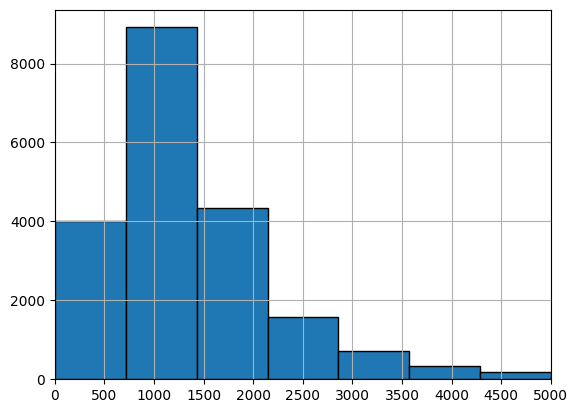

In [ ]:
df_california["Population"].hist(bins=50, edgecolor='black')

plt.xlim(0, 5000)

plt.xticks(np.arange(0, 5001, 500))

In [ ]:
df_california[df_california["Population"] > info_outlier_population["Upper Bound"]]["Population"].mean()

np.float64(4660.786432160804)

In [ ]:
med_upper_population = df_california[df_california["Population"] > info_outlier_population["Upper Bound"]]["Population"].median()
med_upper_population

3961.0

In [ ]:
df_california[df_california["Population"] > med_upper_population]["Population"].count() / length_data

np.float64(0.028924418604651163)

In [ ]:
df_california = df_california[df_california["Population"] < med_upper_population]

In [ ]:
len(df_california)

19792

same as AveRooms technique , we remove outlier from outlier (extreme outlier), we used this because we want to minimalized decreasing data

### 6. AveOccup

<Axes: >

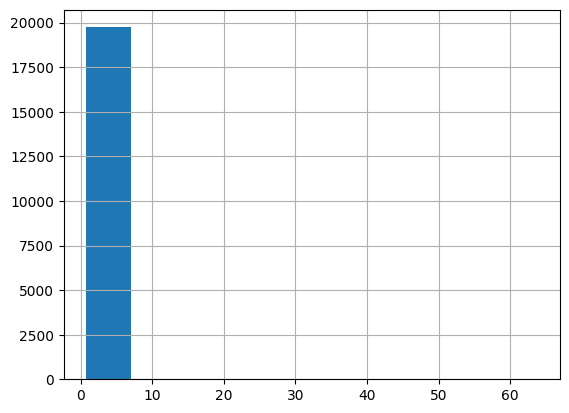

In [ ]:
df_california["AveOccup"].hist()

([<matplotlib.axis.XTick at 0x7bec118f2d90>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15'),
  Text(18, 0, '18')])

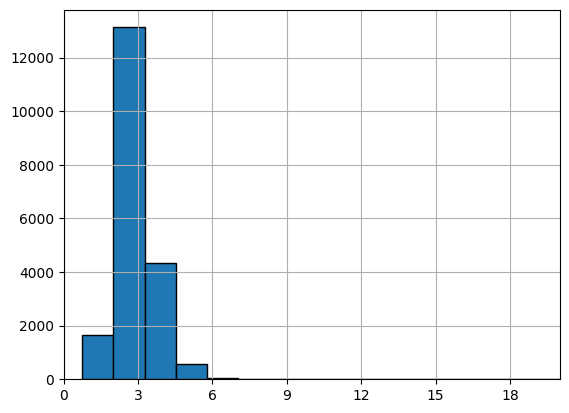

In [ ]:
df_california["AveOccup"].hist(bins=50, edgecolor='black')

plt.xlim(0, 20)

plt.xticks(np.arange(0, 21, 3))

In [ ]:
info_outlier_aveoccup = calculate_outlier_info(df_california, "AveOccup")
upper_aveoccup = info_outlier_aveoccup["Upper Bound"]
lower_aveoccup = info_outlier_aveoccup["Lower Bound"]
print(f"Total Higher than upperbound : {df_california[df_california['AveOccup'] > upper_aveoccup]['AveOccup'].count()}")
print(f"Total Higher than lowerbound : {df_california[df_california['AveOccup'] < 1]['AveOccup'].count()}")
print(f"value lower bound aveoccup: {lower_aveoccup}")
print(f"value upper bound aveoccup: {upper_aveoccup}")


Total Higher than upperbound : 667
Total Higher than lowerbound : 2
value lower bound aveoccup: 1.1522789089420586
value upper bound aveoccup: 4.553545707139941


We may not need to treat values of AveOccup below 1.15 as outliers, since it's contextually reasonable for some neighborhoods to have low occupancy — for example, due to vacant homes or small household sizes

i dont think that exactly higher than 4.5 occupation are outlier

In [ ]:
print(f"mean AveOccup Higher than upperbound : {df_california[df_california['AveOccup'] > upper_aveoccup]['AveOccup'].mean()}")

mean AveOccup Higher than upperbound : 5.749844416720371


In [ ]:
print(f"median AveOccup Higher than upperbound : {df_california[df_california['AveOccup'] > upper_aveoccup]['AveOccup'].median()}")

median AveOccup Higher than upperbound : 4.966101694915254


To help determined the threshold of upper bound effectively , we use helper  z-score. To apply the Z-score method effectively, we first filter the AveOccup values to those less than 12 to ensure the data approximates a normal distribution. Then, using the Z-score formula, we aim to determine the value of AveOccup when the Z-score is equal to 3.

In [ ]:
mean = df_california[df_california['AveOccup'] < 12]["AveOccup"].mean()
std = df_california[df_california['AveOccup'] < 12]["AveOccup"].std()

In [ ]:
x_aveoccup_zscore = 3 * std + mean
print(f"value of aveoccup when z = 3 {x_aveoccup_zscore}")

value of aveoccup when z = 3 5.22736922575312


with helper of Z-score and IQR Method we can choose midpoint between those two

In [ ]:
adjusted_upper_bound = (x_aveoccup_zscore + df_california[df_california['AveOccup'] > upper_aveoccup]['AveOccup'].median()) / 2
print(f"Adjusted Upper bound: {adjusted_upper_bound}")

Adjusted Upper bound: 5.0967354603341875


In [ ]:
#Remove outlier
df_california = df_california[df_california['AveOccup'] < adjusted_upper_bound]

In [ ]:
len(df_california)

19515

In [ ]:
print(f"total data outlier removal: {length_data - len(df_california)}")
print(f"percentage % data outlier removal: {round((length_data - len(df_california)) / length_data * 100 , 3)}%")

total data outlier removal: 1125
percentage % data outlier removal: 5.451%


### 7 , 8. Longtitude & Latitude (No Outlier)

### 9. House Prices

In [ ]:
df_california["house_price"].describe()

,house_price
count,19515.000000
mean,2.079606
std,1.162057
min,0.149990
25%,1.190000
50%,1.813000
75%,2.669500
max,5.000010


In [ ]:
info_outlier_houseprice = calculate_outlier_info(df_california, "house_price")
info_outlier_houseprice

{'Q1': np.float64(1.19),
 'Q3': np.float64(2.6695),
 'IQR': np.float64(1.4795000000000003),
 'Lower Bound': np.float64(-1.0292500000000007),
 'Upper Bound': np.float64(4.888750000000001),
 'Outlier Count': 998,
 'Total Count': 19515,
 'Outlier Percentage': 5.11}

<Axes: >

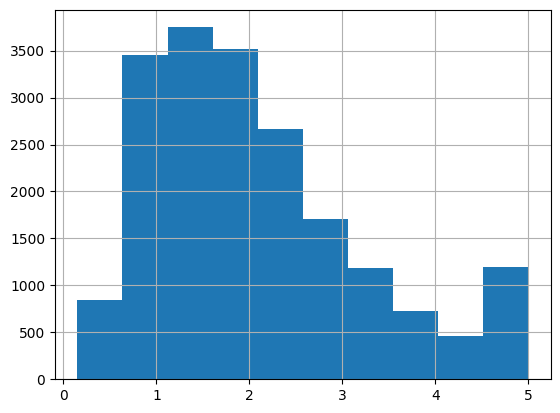

In [ ]:
df_california["house_price"].hist()

if we look at this distribution they dont have extreme outlier, we just need to transform it into log of the value

In [ ]:
df_california["house_price"] = np.log(df_california["house_price"])

<Axes: >

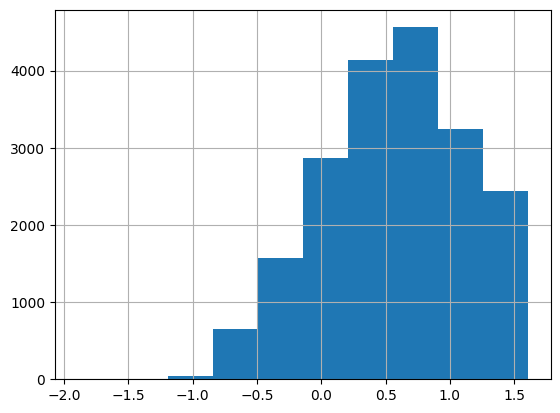

In [ ]:
df_california["house_price"].hist()

In [ ]:
info_outlier_houseprice_after = calculate_outlier_info(df_california, "house_price")

In [ ]:
info_outlier_houseprice_after

{'Q1': np.float64(0.17395330712343798),
 'Q3': np.float64(0.9818911714172727),
 'IQR': np.float64(0.8079378642938346),
 'Lower Bound': np.float64(-1.037953489317314),
 'Upper Bound': np.float64(2.193797967858025),
 'Outlier Count': 19,
 'Total Count': 19515,
 'Outlier Percentage': 0.1}

better right! , from 998 to only 19

In [ ]:
df_california = df_california[
    (df_california["house_price"] > info_outlier_houseprice_after["Lower Bound"]) &
    (df_california["house_price"] < info_outlier_houseprice_after["Upper Bound"])
]


<Axes: >

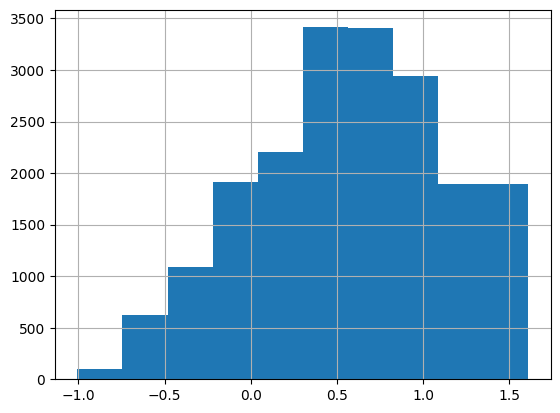

In [ ]:
df_california["house_price"].hist()

### Finale Result

In [ ]:
print(f"total data outlier removal: {length_data - len(df_california)}")
print(f"percentage % data outlier removal: {round((length_data - len(df_california)) / length_data * 100 , 3)}%")

total data outlier removal: 1144
percentage % data outlier removal: 5.543%


WEE Only removing 5.543% from actual data, Congrats!!!

## B. Missing Value Handling

Lakukan analisis missing valye, dan lakukan treatment apapun terhadap missing values tersebut yang anda nilai sesuai.

In [ ]:
df_company = pd.read_csv('company.csv')

In [ ]:
df_company.describe()

,Rating
count,622.000000
mean,3.545498
std,1.373081
min,-1.000000
25%,3.400000
50%,3.800000
75%,4.300000
max,5.000000


In [ ]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        622 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


look at how much missing value

In [ ]:
df_company.isna().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


easy , just rating that have missing value

In [ ]:
print(f"percentage % of missing data {round(df_company['Rating'].isna().sum() / len(df_company) * 100 , 3)}%")

percentage % of missing data 7.44%


7 % data will be removed from data if we choose remove row

if we remove rating column , total variable (columns) will be 3, and i think that's not good idea unless the missing value > 50%

let's see the distribution

<Axes: >

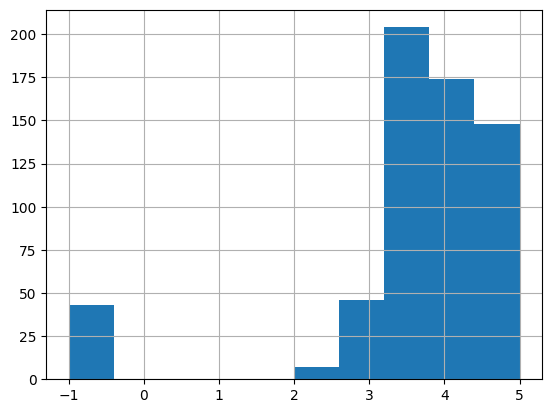

In [ ]:
df_company["Rating"].hist()

We used the median to impute missing values in the rating column because the data is skewed, making the median more robust than the mean. but also, drop missing value its also fine cus only 7% of data will be removed

In this case , i will used median imputation method

In [ ]:
df_company["Rating"] = df_company["Rating"].fillna(df_company["Rating"].median())
df_company["Rating"].isna().sum()

np.int64(0)

DONE!!!!!!!

## C. Encoding

Lakukan analisis terhadap data, dan lakukan label encoding atau on-hot encoding terhadap kolom kategorical-nya.

Silahkan tentukan sendiri teknik encoding yang sesuai.

In [ ]:
df_churn = pd.read_csv('Telco_customer_churn.csv')

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
numerical_cols = df_churn.select_dtypes(include="number").columns
numerical_cols = list(numerical_cols)
numerical_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [ ]:
object_cols = df_churn.select_dtypes(include="object").columns
object_cols = list(object_cols)
object_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [ ]:
df_churn[object_cols].describe()

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2,20
top,3186-AJIEK,United States,California,Los Angeles,"34.159534, -116.425984",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174,192


In [ ]:
# only print object column that have < 10 unique value
for col in object_cols:
    if df_churn[col].nunique() < 10:
        print(f"{col} : {df_churn[col].unique()}")

Country : ['United States']
State : ['California']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : ['Yes' 'No']


from this , we can classified each column to encode technique

One-Hot-Encoding = [Internet Service, Payment Mehod, Internet Service]

Label Encoding = [Country , State, Gender, Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies , Contract, Paperless Billing, Churn Label]

So i classified the column to specific encoding method from the type of the column, is it ordinal, or is it nominal

In [ ]:
#Yes or No unique column
for col in object_cols:
    if set(df_churn[col].unique()) == {"Yes" , "No"}:
        df_churn[col] = df_churn[col].map({"Yes" : 1 , "No" : 0})

In [ ]:
for col in object_cols:
    if df_churn[col].nunique() < 10:
        print(f"{col} : {df_churn[col].unique()}")

Country : ['United States']
State : ['California']
Gender : ['Male' 'Female']
Senior Citizen : [0 1]
Partner : [0 1]
Dependents : [0 1]
Phone Service : [1 0]
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : [1 0]
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : [1 0]


encode for column having ["Yes","No", "No ...... service"]

Example: Internet

"No internet service" = 0
→ Indicates lack of access (lowest possible level of service).

"No" = 1
→ Has internet, but doesn't use this particular service.

"Yes" = 2
→ Actively uses the service (highest engagement).

(Apply to any of column that have the same characteristic column)

In [ ]:
for col in object_cols:
    unique_values = set(df_churn[col].unique())
    if (
        "Yes" in unique_values
        and any(val.startswith("No ") and val != "No" for val in unique_values)
    ):
        df_churn[col] = df_churn[col].map(lambda x: 2 if x == "Yes" else 1 if x == "No" else 0)


In [ ]:
for col in object_cols:
    if df_churn[col].nunique() < 10:
        print(f"{col} : {df_churn[col].unique()}")

Country : ['United States']
State : ['California']
Gender : ['Male' 'Female']
Senior Citizen : [0 1]
Partner : [0 1]
Dependents : [0 1]
Phone Service : [1 0]
Multiple Lines : [1 2 0]
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : [2 1 0]
Online Backup : [2 1 0]
Device Protection : [1 2 0]
Tech Support : [1 2 0]
Streaming TV : [1 2 0]
Streaming Movies : [1 2 0]
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : [1 0]
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : [1 0]


In [ ]:
df_churn["Gender"] = df_churn["Gender"].map({"Male" : 1 , "Female" : 0})

In [ ]:
df_churn["Country"] = df_churn["Country"].map({"United States" : 1})

In [ ]:
df_churn["State"] = df_churn["State"].map({"California" : 1})

I noticed that the Country and State column only has a single unique value, which means it carries no variance and thus won't contribute any useful information to the machine learning model. Normally, I would remove this kind of column, but I kept it for now as per the instructions of this assignment.

In [ ]:
for col in object_cols:
    if df_churn[col].nunique() < 10:
        print(f"{col} : {df_churn[col].unique()}")

Country : [1]
State : [1]
Gender : [1 0]
Senior Citizen : [0 1]
Partner : [0 1]
Dependents : [0 1]
Phone Service : [1 0]
Multiple Lines : [1 2 0]
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : [2 1 0]
Online Backup : [2 1 0]
Device Protection : [1 2 0]
Tech Support : [1 2 0]
Streaming TV : [1 2 0]
Streaming Movies : [1 2 0]
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : [1 0]
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : [1 0]


In [ ]:
df_churn["Contract"] = df_churn["Contract"].map(lambda x: 2 if x == "Two year" else 1 if x == "One year" else 0)

this column is also have ordinal cause it is based on the length of the contract

In [ ]:
df_churn = pd.get_dummies(df_churn, columns=['Payment Method' ,"Internet Service" ], prefix=['Payment Method' ,"Internet Service" ], dtype=int)

In [ ]:
df_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No
0,3668-QPYBK,1,1,1,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,0,0,0,2,1,1,2,2,1,1,1,1,0,1,53.85,108.15,1,1,86,3239,Competitor made better offer,0,0,0,1,1,0,0
1,9237-HQITU,1,1,1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,0,0,1,2,1,1,1,1,1,1,1,1,0,1,70.70,151.65,1,1,67,2701,Moved,0,0,1,0,0,1,0
2,9305-CDSKC,1,1,1,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,0,0,1,8,1,2,1,1,2,1,2,2,0,1,99.65,820.5,1,1,86,5372,Moved,0,0,1,0,0,1,0
3,7892-POOKP,1,1,1,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,0,1,1,28,1,2,1,1,2,2,2,2,0,1,104.80,3046.05,1,1,84,5003,Moved,0,0,1,0,0,1,0
4,0280-XJGEX,1,1,1,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,0,0,1,49,1,2,1,2,2,1,2,2,0,1,103.70,5036.3,1,1,89,5340,Competitor had better devices,1,0,0,0,0,1,0


now lets analyze for the high cardinality column

In [ ]:
for col in df_churn.select_dtypes(include="object").columns:
    if df_churn[col].nunique() > 10:
        print(f"{col} : {df_churn[col].unique()[:3]}")
        print(f"{col} Total : {df_churn[col].nunique()}")

CustomerID : ['3668-QPYBK' '9237-HQITU' '9305-CDSKC']
CustomerID Total : 7043
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park']
City Total : 1129
Lat Long : ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953']
Lat Long Total : 1652
Total Charges : ['108.15' '151.65' '820.5']
Total Charges Total : 6531
Churn Reason : ['Competitor made better offer' 'Moved' 'Competitor had better devices']
Churn Reason Total : 20


Impossible for us to one hot encoding this all high card cols, because it can make our data have so much dimensions

column Total charges  its not object but it is float type

In [ ]:
df_churn["Total Charges"] = pd.to_numeric(df_churn["Total Charges"], errors='coerce')

In [ ]:
df_churn["Total Charges"].isna().sum()

np.int64(11)

In [ ]:
df_churn["Total Charges"].describe()

,Total Charges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


i think we dont need Lat Long column for ML Model, beacuse this df have its own Latitude and Longtitude column, and also for CustomerID cuz It's just a unique identifier, like a serial number.Has no predictive power each value is unique and doesn’t relate to the target.

In [ ]:
df_churn.drop(["Lat Long", "CustomerID"] ,axis = 1 , inplace = True)

In [ ]:
df_churn.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No
0,1,1,1,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,1,1,2,2,1,1,1,1,0,1,53.85,108.15,1,1,86,3239,Competitor made better offer,0,0,0,1,1,0,0
1,1,1,1,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,1,1,1,1,1,1,1,1,0,1,70.70,151.65,1,1,67,2701,Moved,0,0,1,0,0,1,0
2,1,1,1,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,1,2,1,1,2,1,2,2,0,1,99.65,820.50,1,1,86,5372,Moved,0,0,1,0,0,1,0
3,1,1,1,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,1,2,1,1,2,2,2,2,0,1,104.80,3046.05,1,1,84,5003,Moved,0,0,1,0,0,1,0
4,1,1,1,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,1,2,1,2,2,1,2,2,0,1,103.70,5036.30,1,1,89,5340,Competitor had better devices,1,0,0,0,0,1,0


let's analyze churn reason column

In [ ]:
df_churn["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

well if we want to make Model ML, this type a column will leakage the actual predicted because churn reason comes after the customer churn, (That information is only known after the customer has already churned), so my decision is to dropped the column

in this dataset, there are more column data leakage, but for now let's just focused on the object column

In [ ]:
df_churn.drop("Churn Reason" ,axis = 1 , inplace = True)

In [ ]:
label_encoder = LabelEncoder()
df_churn["City"] = label_encoder.fit_transform(df_churn["City"])

In [ ]:
df_churn.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No
0,1,1,1,562,90003,33.964131,-118.272783,1,0,0,0,2,1,1,2,2,1,1,1,1,0,1,53.85,108.15,1,1,86,3239,0,0,0,1,1,0,0
1,1,1,1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,1,1,1,1,1,1,1,0,1,70.70,151.65,1,1,67,2701,0,0,1,0,0,1,0
2,1,1,1,562,90006,34.048013,-118.293953,0,0,0,1,8,1,2,1,1,2,1,2,2,0,1,99.65,820.50,1,1,86,5372,0,0,1,0,0,1,0
3,1,1,1,562,90010,34.062125,-118.315709,0,0,1,1,28,1,2,1,1,2,2,2,2,0,1,104.80,3046.05,1,1,84,5003,0,0,1,0,0,1,0
4,1,1,1,562,90015,34.039224,-118.266293,1,0,0,1,49,1,2,1,2,2,1,2,2,0,1,103.70,5036.30,1,1,89,5340,1,0,0,0,0,1,0


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Count                                     7043 non-null   int64  
 1   Country                                   7043 non-null   int64  
 2   State                                     7043 non-null   int64  
 3   City                                      7043 non-null   int64  
 4   Zip Code                                  7043 non-null   int64  
 5   Latitude                                  7043 non-null   float64
 6   Longitude                                 7043 non-null   float64
 7   Gender                                    7043 non-null   int64  
 8   Senior Citizen                            7043 non-null   int64  
 9   Partner                                   7043 non-null   int64  
 10  Dependents                          

## D. Numeric Scaling

Analisis distirbusi dan min/max dari feature, dan lakukan min-max scaling serta standard scaling pada features tersebut.

Lakukan kedua teknik scaling. Pilih bebas feature mana untuk standard scaling, dan mana untuk min-max scaling.

In [ ]:
df_churn[numerical_cols].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df_churn["Count"].unique()

array([1])

The Count column is not useful for modeling because all of its values are 1.0, indicating that it doesn't provide any distinguishing information—it can be safely removed. The Zip Code column, while numeric in format, actually represents categorical location data rather than a continuous numerical feature, and should be treated accordingly. As for Latitude and Longitude, they are geographic coordinates and are typically not scaled directly. Instead, they are often transformed into features such as distances from a central point, clusters, or encoded using methods like geohashing to capture spatial relationships more effectively.

In [ ]:
scaler = StandardScaler()
df_churn[["Tenure Months", "Monthly Charges", "CLTV", "Churn Score"]] = scaler.fit_transform(
    df_churn[["Tenure Months", "Monthly Charges", "CLTV", "Churn Score"]]
)

In [ ]:
df_churn.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No
0,1,1,1,562,90003,33.964131,-118.272783,1,0,0,0,-1.236724,1,1,2,2,1,1,1,1,0,1,-0.362660,108.15,1,1,1.268402,-0.981675,0,0,0,1,1,0,0
1,1,1,1,562,90005,34.059281,-118.307420,0,0,0,1,-1.236724,1,1,1,1,1,1,1,1,0,1,0.197365,151.65,1,1,0.385650,-1.436462,0,0,1,0,0,1,0
2,1,1,1,562,90006,34.048013,-118.293953,0,0,0,1,-0.992402,1,2,1,1,2,1,2,2,0,1,1.159546,820.50,1,1,1.268402,0.821409,0,0,1,0,0,1,0
3,1,1,1,562,90010,34.062125,-118.315709,0,0,1,1,-0.177995,1,2,1,1,2,2,2,2,0,1,1.330711,3046.05,1,1,1.175481,0.509483,0,0,1,0,0,1,0
4,1,1,1,562,90015,34.039224,-118.266293,1,0,0,1,0.677133,1,2,1,2,2,1,2,2,0,1,1.294151,5036.30,1,1,1.407784,0.794358,1,0,0,0,0,1,0


In [ ]:
df_churn["City"].unique()

array([ 562,   77,  442, ...,  965, 1031,  713])

We do not scale nominal categorical features that have been encoded or have fewer than 10 unique values, because those values do not have any numerical meaning or order relationship that can be captured by a scaler like StandardScaler.

## E. Lainnya

Pilihlah salah satu dataset dari ketiga dataset yang diberikan. Analisis lebih lanjut data tersebut, dan lakukan data cleaning lainnya yang menurut anda diperlukan.

Saya akan memilih dataset california

In [ ]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19496 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19496 non-null  float64
 1   HouseAge     19496 non-null  float64
 2   AveRooms     19496 non-null  float64
 3   AveBedrms    19496 non-null  float64
 4   Population   19496 non-null  float64
 5   AveOccup     19496 non-null  float64
 6   Latitude     19496 non-null  float64
 7   Longitude    19496 non-null  float64
 8   house_price  19496 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


### Missing value

In [ ]:
df_california.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
house_price,0


no missing value

### Duplicate data

In [ ]:
df_california.duplicated().sum()

np.int64(0)

no duplicate data

### Distribution




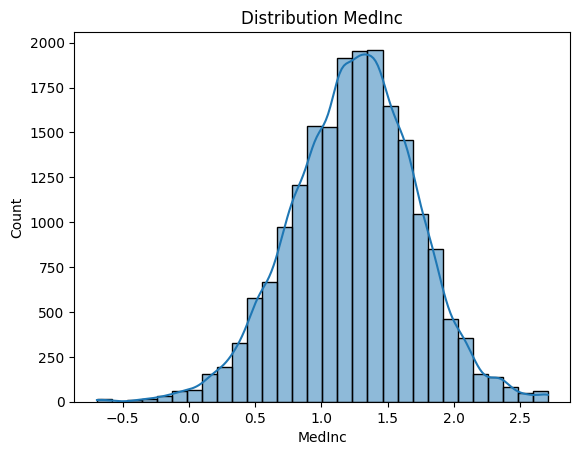

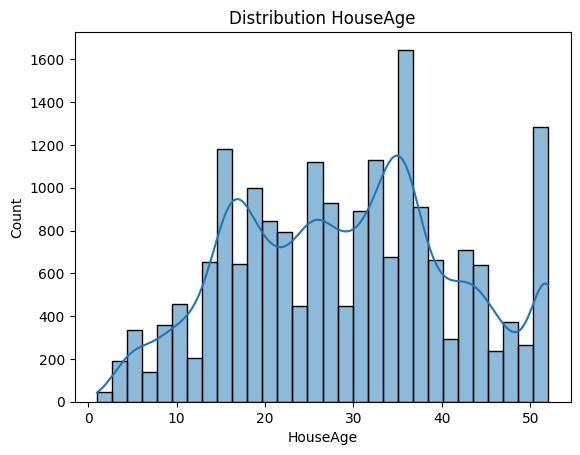

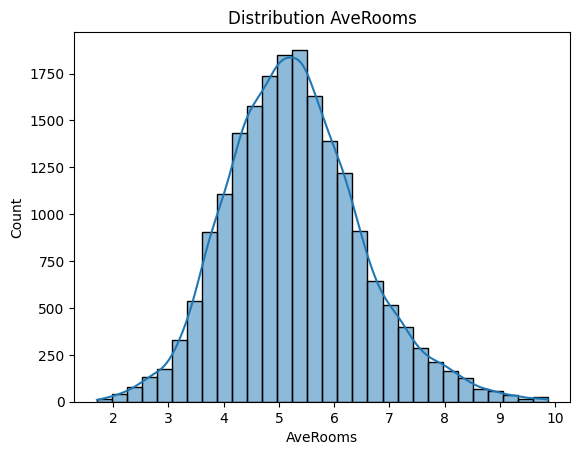

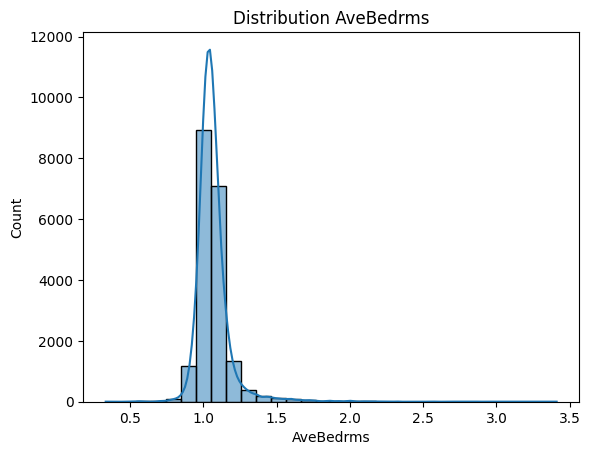

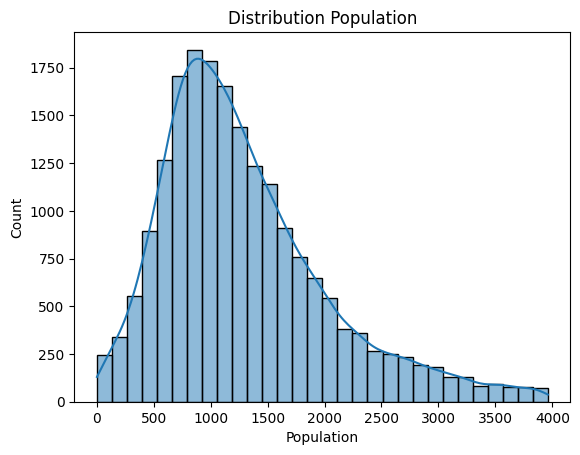

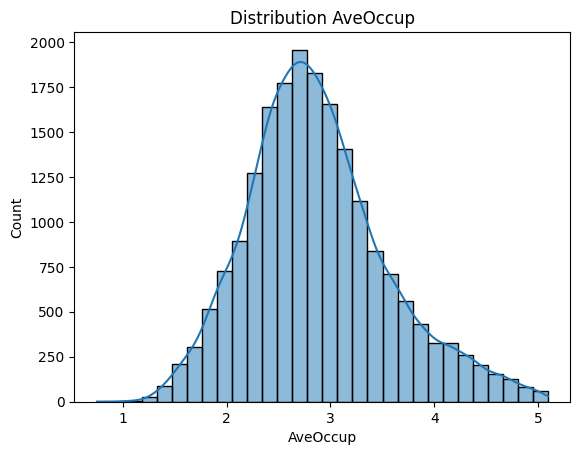

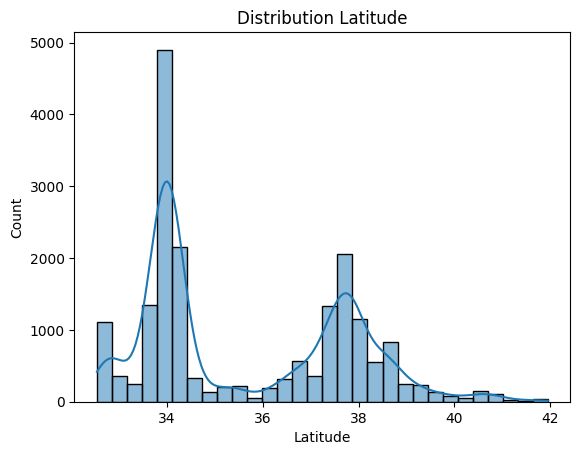

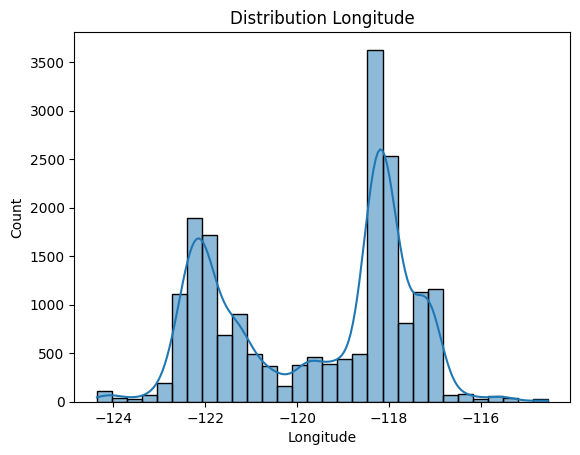

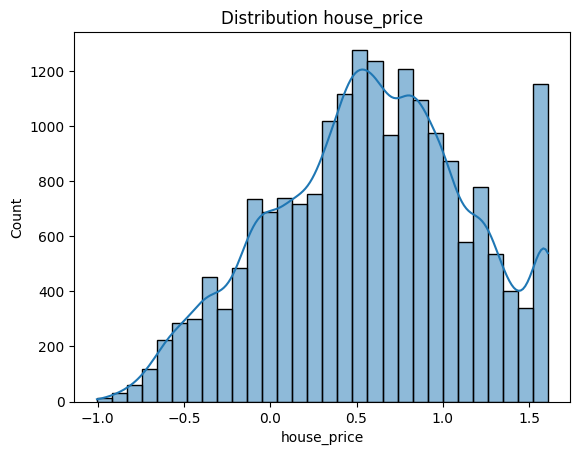

In [ ]:
for col in df_california.columns:
    sns.histplot(data=df_california, x=col, bins=30, kde=True)
    plt.title(f'Distribution {col}')
    plt.show()

no need to convert to normal distribution

### Numerical Scalling

latitude and longtitude no need to scale cause its represent a location not "numerical" like population , house_price, etc. we can transform it into the actual location , or haversine distance, etc

In [ ]:
cols_to_scale = [col for col in df_california.columns if col not in ["Latitude", "Longitude"]]

df_california[cols_to_scale] = scaler.fit_transform(df_california[cols_to_scale])

In [ ]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,1.861642,0.954498,1.403759,-0.327784,-1.330672,-0.473400,37.88,-122.23,1.637410
1,1.855542,-0.653578,0.787704,-0.734694,1.499411,-1.131398,37.86,-122.22,1.227962
2,1.569200,1.838940,2.480638,0.061165,-1.093811,-0.109195,37.85,-122.24,1.196318
3,1.033197,1.838940,0.440210,0.058132,-1.009412,-0.484635,37.85,-122.25,1.141591
4,0.216481,1.838940,0.823806,0.120990,-0.999883,-1.025659,37.85,-122.25,1.146218


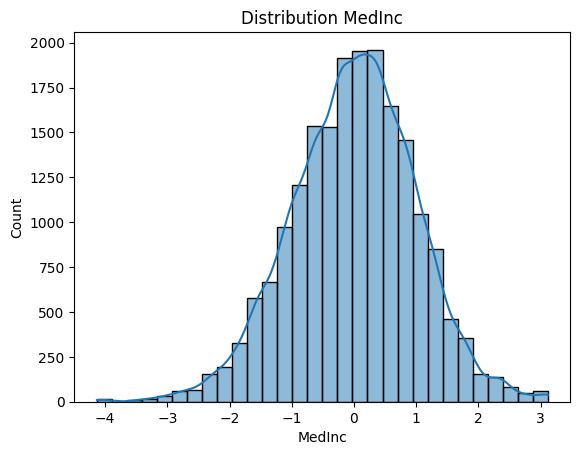

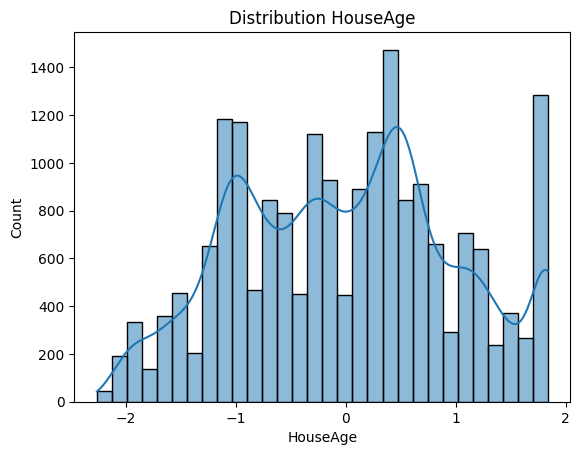

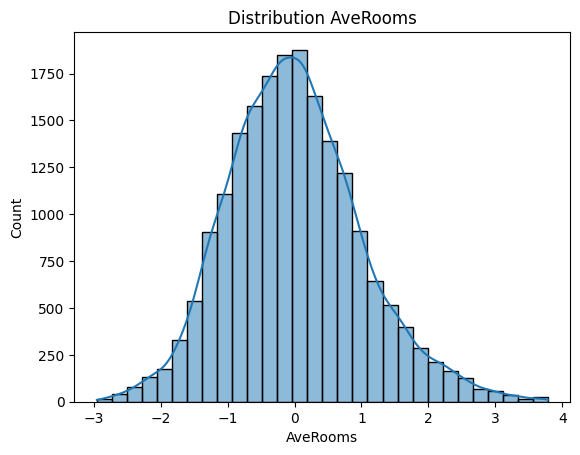

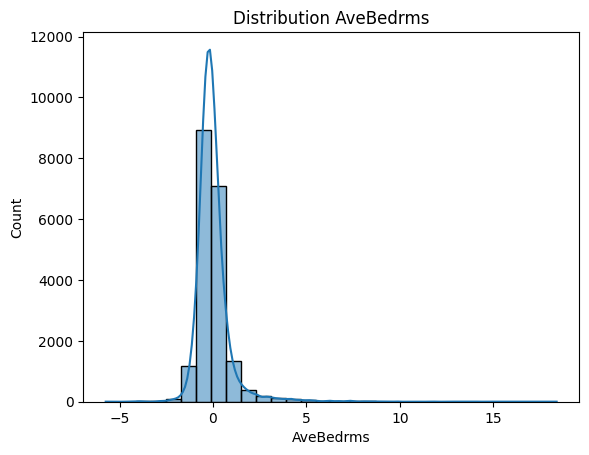

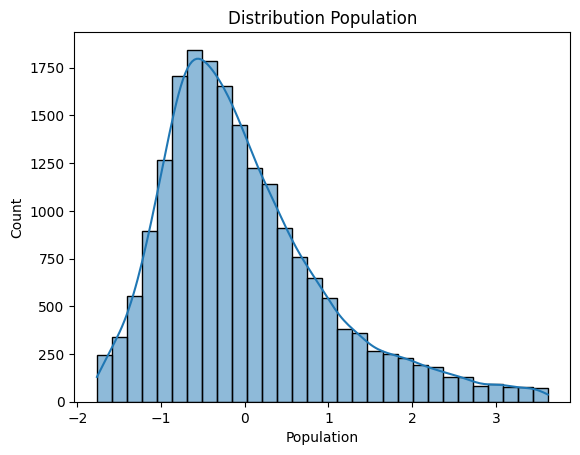

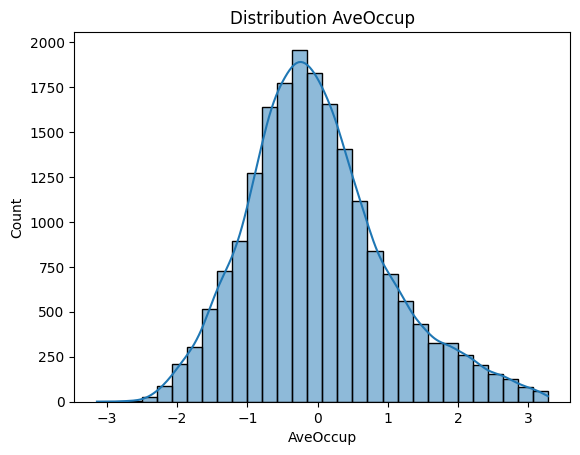

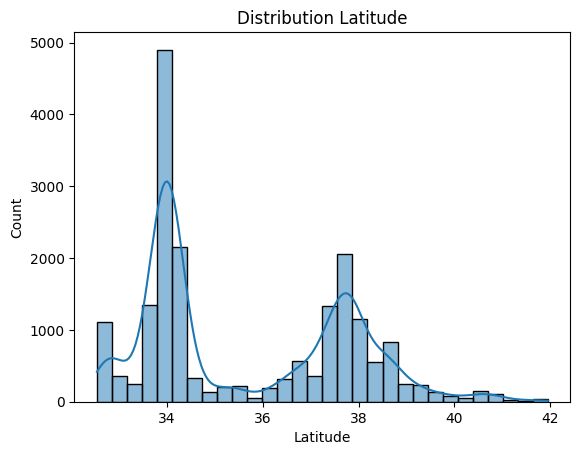

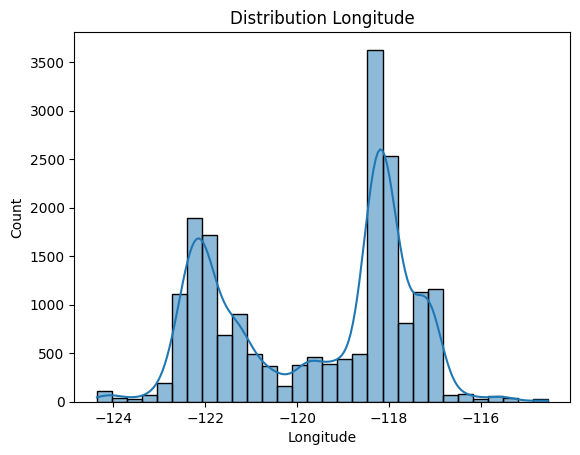

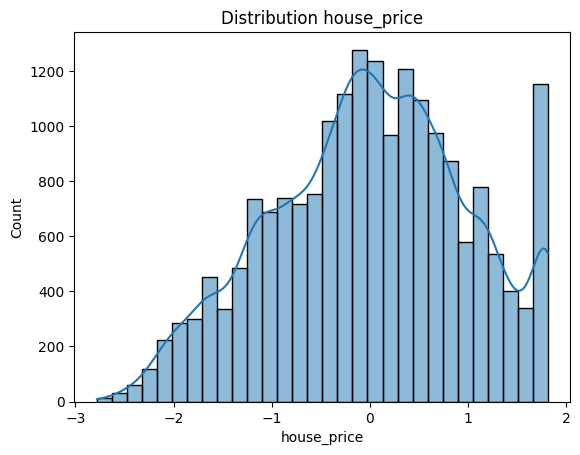

In [ ]:
for col in df_california.columns:
    sns.histplot(data=df_california, x=col, bins=30, kde=True)
    plt.title(f'Distribution {col}')
    plt.show()